In [1]:
# from AHPLib import *
from AhpAnpLib import inputs_AHPLib as input
from AhpAnpLib import structs_AHPLib as str
from AhpAnpLib import calcs_AHPLib as calc

### ANP Water reservoir model

### Structure of the model

In [2]:
#Create model
Reservoir = str.Model("Water Reservoir")

#Create two clusters
Purposes = str.Cluster("1Purposes",1)
Alternatives = str.Cluster("2Alternative Water Levels",2)

#Create nodes in Purposes
FloodControl = str.Node("1FloodControl",1)
Recreation = str.Node("2Recreation",2)
Hydroelectric = str.Node("3Hydroelectric Power",3)

Purposes.addMultipleNodes2Cluster(FloodControl,Recreation,Hydroelectric)

#Create water levels
Lo = str.Node("1Lo",1)
Med = str.Node("2Med",2)
Hi = str.Node("3Hi",3)

Alternatives.addMultipleNodes2Cluster(Lo,Med,Hi)

#Include clusters in the model
Reservoir.addMultipleClusters2Model(Purposes,Alternatives)

In [3]:
#Add connections from all nodes to all nodes
Reservoir.addNodeConnectionFromAllNodesToAllNodesOfCluster("1Purposes","2Alternative Water Levels")
Reservoir.addNodeConnectionFromAllNodesToAllNodesOfCluster("2Alternative Water Levels","1Purposes")


### Questionnaire of the model

In [4]:
#Export Questionnaires
input.export4ExcelQuestFull(Reservoir,"WaterReservior_Full_empty.xlsx",True)

### Import filledin questionnaire, calculate and export results 

In [5]:
calc.calcAHPMatricesSave2File(Reservoir,"WaterReservior_Full_filledin.xlsx","WaterReservior_Full_results.xlsx",True,False,True,False)

Matrix not a  Hierarchy 
Anp result [0.120 0.187 0.192 0.112 0.186 0.202]
Limit matrix [[0.000 0.000 0.000 0.241 0.241 0.241]
 [0.000 0.000 0.000 0.374 0.374 0.374]
 [0.000 0.000 0.000 0.385 0.385 0.385]
 [0.223 0.223 0.223 0.000 0.000 0.000]
 [0.372 0.372 0.372 0.000 0.000 0.000]
 [0.405 0.405 0.405 0.000 0.000 0.000]]
Matrix not a  Hierarchy 
Anp result [0.120 0.187 0.192 0.112 0.186 0.202]
Limit matrix [[0.000 0.000 0.000 0.241 0.241 0.241]
 [0.000 0.000 0.000 0.374 0.374 0.374]
 [0.000 0.000 0.000 0.385 0.385 0.385]
 [0.223 0.223 0.223 0.000 0.000 0.000]
 [0.372 0.372 0.372 0.000 0.000 0.000]
 [0.405 0.405 0.405 0.000 0.000 0.000]]
Matrix not a  Hierarchy 
Anp result [0.120 0.187 0.192 0.112 0.186 0.202]
Limit matrix [[0.000 0.000 0.000 0.241 0.241 0.241]
 [0.000 0.000 0.000 0.374 0.374 0.374]
 [0.000 0.000 0.000 0.385 0.385 0.385]
 [0.223 0.223 0.223 0.000 0.000 0.000]
 [0.372 0.372 0.372 0.000 0.000 0.000]
 [0.405 0.405 0.405 0.000 0.000 0.000]]


### Visualize the model

Cluster from 1Purposes connected to: [2Alternative Water Levels order: 2]
Cluster from 2Alternative Water Levels connected to: [1Purposes order: 1]


/Library/Frameworks/Python.framework/Versions/3.12/lib/python3.12/site-packages/networkx/drawing/nx_pylab.py:437: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  node_collection = ax.scatter(


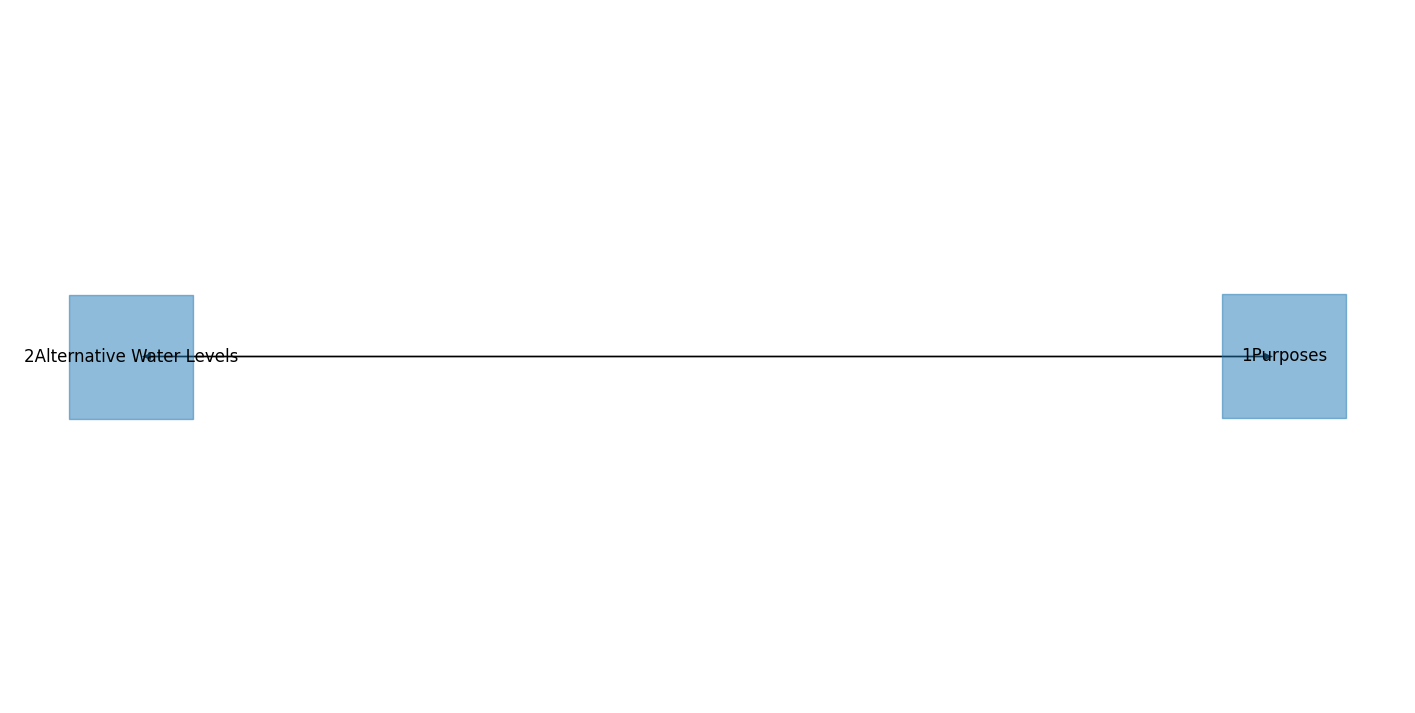

In [6]:
#plot
Reservoir.drawGraphClusters()